# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes

north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")


In [2]:
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [3]:
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [4]:
# Put your EDA code here

display(north_df.describe())
display(south_df.describe())

#Question 1:
north_reps = len(np.unique(north_df["Rep ID"]))
south_reps = len(np.unique(south_df["Rep ID"]))

#Question 2:
north_mean_bm = round(north_df["Busy Minutes"].mean(),2)
north_mean_nrm = round(north_df["Not Ready Minutes"].mean(),2)
north_mean_iwt = round(north_df["Incoming Wait Time"].mean(),2)
north_mean_dcwt = round(north_df["During Call Wait Time"].mean(),2)

south_mean_bm = round(south_df["Busy Minutes"].mean(),2)
south_mean_nrm = round(south_df["Not Ready Minutes"].mean(),2)
south_mean_iwt = round(south_df["Incoming Wait Time"].mean(),2)
south_mean_dcwt = round(south_df["During Call Wait Time"].mean(),2)

#Question 3:
north_mean_ctb = north_df["Time Block"].value_counts()
south_mean_ctb = south_df["Time Block"].value_counts()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [5]:
print("Question 1:\n")
print(f"There are {north_reps} reps at the North Call Center.")
print(f"There are {south_reps} reps at the South Call Center.")
print("\nQuestion 2:\n")
print(f"""For the North Call Center...
        the average busy minutes was {north_mean_bm} minutes.
        the average not ready minutes was {north_mean_nrm} minutes.
        the average incoming wait time was {north_mean_iwt} minutes.
        the average during call wait time was {north_mean_dcwt} minutes.""")
print("\n")
print(f"""For the South Call Center...
        the average busy minutes was {south_mean_bm} minutes.
        the average not ready minutes was {south_mean_nrm} minutes.
        the average incoming wait time was {south_mean_iwt} minutes.
        the average during call wait time was {south_mean_dcwt} minutes.""")
print("\nQuestion 3:\n")
print(f"""For the North Call Center, the number of calls taken for each time block was...
{north_mean_ctb}""")
print("\n")
print(f"""For the South Call Center, the number of calls taken for each time block was...
{south_mean_ctb}""")

Question 1:

There are 9 reps at the North Call Center.
There are 11 reps at the South Call Center.

Question 2:

For the North Call Center...
        the average busy minutes was 9.99 minutes.
        the average not ready minutes was 1.91 minutes.
        the average incoming wait time was 3.05 minutes.
        the average during call wait time was 2.97 minutes.


For the South Call Center...
        the average busy minutes was 10.05 minutes.
        the average not ready minutes was 1.91 minutes.
        the average incoming wait time was 3.0 minutes.
        the average during call wait time was 3.08 minutes.

Question 3:

For the North Call Center, the number of calls taken for each time block was...
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64


For the South Call Center, the number of calls taken for each time block was...
12:00 PM    75
10:00 AM    56
3:00 P

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [6]:
# Clean your data here
#Question 1:
north_calls = north_df["Incoming or Outgoing"].value_counts(sort = False)
north_num_nan = north_df.groupby(['Incoming or Outgoing'])['Incoming Wait Time'].apply(lambda x: x.isnull().sum())
south_calls = south_df["Incoming or Outgoing"].value_counts(sort = False)
south_num_nan = south_df.groupby(['Incoming or Outgoing'])['Incoming Wait Time'].apply(lambda x: x.isnull().sum())

print("North Call Center:")
north_calls_df = pd.DataFrame({'Total Calls':north_calls.values, 'Null Calls':north_num_nan})
display(north_calls_df)
print("South Call Center:")
south_calls_df = pd.DataFrame({'Total Calls':south_calls.values, 'Null Calls':south_num_nan})
display(south_calls_df)

North Call Center:


,Total Calls,Null Calls
Incoming or Outgoing,,
Incoming,82,0
Outgoing,163,163


South Call Center:


,Total Calls,Null Calls
Incoming or Outgoing,,
Incoming,126,0
Outgoing,188,188


In [7]:
#Question 2:
print("Duplicated Values:")
display(np.unique(north_df["Sale"]))

print("Fixed Values:")
north_df.replace("YES ", "YES", inplace = True)
display(np.unique(north_df["Sale"]))

Duplicated Values:


array(['NO', 'YES', 'YES '], dtype=object)

Fixed Values:


array(['NO', 'YES'], dtype=object)

In [8]:
#Question 3:
print("North Center Duplicated Rows:")
north_dup = north_df[north_df.duplicated()]
display(north_dup)

print("South Center Duplicated Rows:")
south_dup = south_df[south_df.duplicated()]
display(south_dup)

North Center Duplicated Rows:


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


South Center Duplicated Rows:


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [9]:
#Question 4:
display(north_df.drop(["Calls"], axis = 1))

display(south_df.drop(["Calls"], axis = 1))


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

1. Yes, looking at the dataframes above, all of the null incoming wait time correspong with the outgoing calls.

2. There are two separate "YES" values because one of the values has an extra space at the end. I rectified the issue by replacing that value ("YES ") with the correct one ("YES"). 

3. There are not any duplications in the two datasets.

4. I dropped the "Calls" column from both of the datasets because they are unncessary. If a call was made, it was added as a row to the dataframe, so it's not necessary to create a column to indicate if a call was made. 

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [10]:
# Manipulate data here
#Before Questions (Combining Dataframes)
callcenter_df = north_df.append(south_df, ignore_index = True)
callcenter_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [11]:
#Question 1:
callcenter_df.groupby(["Branch", "Rep ID"]).size()

Branch  Rep ID
North   Amanda    23
        Andy      23
        Brent     37
        Cam       24
        Duke      29
        Joe       26
        Lilly     30
        Todd      29
        Xander    24
South   Alice     20
        Eric      35
        George    29
        Helga     31
        Josh      26
        Karl      28
        Kate      29
        Randy     33
        Sandy     32
        Sharon    25
        Susan     26
dtype: int64

In [12]:
#Question 2:
callcenter_size = callcenter_df.groupby(["Branch"]).size()
car = callcenter_df.groupby("Branch").sum()
car["Total Calls"] = callcenter_size
car['Call Abandonment Rate (%)'] = round((car["Abandoned"] / callcenter_size) * 100, 2)
car.drop(["Unnamed: 0", "Lost Call", "Busy Minutes", "Not Ready Minutes", "During Call Wait Time","Incoming Wait Time"], axis = 1, inplace = True)
print("Call Abandonment Rates for Each Branch:")
display(car)

whole_car = callcenter_df.groupby(["Abandoned"]).size()
whole_car_df = whole_car.reset_index()
whole_car_df.rename(columns = {0: "Calls", "Abandoned": "Abandoned?"}, inplace = True)
whole_car_df["Call Rate (%)"] = round((whole_car_df["Calls"] / len(callcenter_df)) * 100, 2)
print("Call Rates for Whole Company:")
display(whole_car_df)

Call Abandonment Rates for Each Branch:


,Abandoned,Calls,Total Calls,Call Abandonment Rate (%)
Branch,,,,
North,7,245,245,2.86
South,4,314,314,1.27


Call Rates for Whole Company:


,Abandoned?,Calls,Call Rate (%)
0,0,548,98.03
1,1,11,1.97


In [13]:
#Question 3: (There probably was an easier way to approach this...)
iwt = callcenter_df[["Branch","Incoming or Outgoing","Incoming Wait Time"]]
incoming_only= iwt[iwt["Incoming or Outgoing"] != "Outgoing"]
service_level = iwt['Incoming Wait Time'] < 2
incoming_only["Answered Within 2 Seconds"] = service_level
service_level = incoming_only.drop(["Incoming or Outgoing"], axis = 1)
service_level_df = service_level.groupby(["Branch","Answered Within 2 Seconds"]).count()
service_df = service_level_df.reset_index()
service_df.rename(columns = {"Incoming Wait Time" : "Total"}, inplace = True)

branch_totals = service_level.groupby(["Branch"]).size()
branch_tot_incoming_calls = []

for branch in service_df["Branch"]:
    branch_tot_incoming_calls += [branch_totals[branch]]

service_df["Service Level (%)"] = round((service_df["Total"] / branch_tot_incoming_calls) * 100, 2)

print("Service Level for Each Branch:")
display(service_df)

print("Service Level for Whole Company:")
whole_service = incoming_only["Answered Within 2 Seconds"].value_counts()
whole_service_df = pd.DataFrame(whole_service)
whole_service_df["Service Level (%)"] = round((whole_service_df["Answered Within 2 Seconds"] / incoming_only["Branch"].count()) * 100, 2)
display(whole_service_df)

Service Level for Each Branch:


/var/folders/5b/1kgszmgs6f51lh_vxdlr496c0000gn/T/ipykernel_30395/401723449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incoming_only["Answered Within 2 Seconds"] = service_level


,Branch,Answered Within 2 Seconds,Total,Service Level (%)
0,North,False,65,79.27
1,North,True,17,20.73
2,South,False,106,84.13
3,South,True,20,15.87


Service Level for Whole Company:


,Answered Within 2 Seconds,Service Level (%)
False,171,82.21
True,37,17.79


In [14]:
#Question 4:
print("IWT Analysis for Each Branch:")
display(incoming_only.groupby("Branch").describe())
print("IWT Analysis for Whole Company:")
display(incoming_only.describe())

IWT Analysis for Each Branch:


Incoming Wait Time                                            
                    count     mean       std  min  25%  50%  75%  max
Branch                                                               
North                82.0  3.04878  1.456382  1.0  2.0  3.0  4.0  5.0
South               126.0  3.00000  1.308434  1.0  2.0  3.0  4.0  5.0

IWT Analysis for Whole Company:


,Incoming Wait Time
count,208.000000
mean,3.019231
std,1.365417
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

1. Eric from the South Call Center had the most calls from his branch (35 calls); and Brent from the North Call Center had the most calls from his branch (37 calls).

2. The call abandonement rate for the North and South Branches are 2.86% and 1.27% respectively. The call abandonement rate for the whole company is 1.97%. For the South Branch and the whole company, these percentages are less than 2% (outside of the optimal range), which means many people are not hanging up during the calls. The North Branch's call abandonement rate falls within the range, so this may or may not be something important for the company to look at. 

3. The percentage of calls that are answered within 2 seconds for the North and South Branches are 20.73% and 15.87% respectively. For the whole company, the percentage of calls answered within 2 seconds is 17.79%.

4. For North and South branches, the average answering speed is 3.05 and 3.00 seconds respectively. For the whole company, the average answering speed is 3.02 seconds. 

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

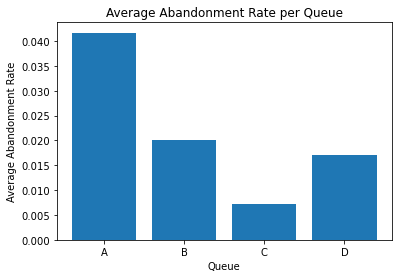

In [16]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = callcenter_df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
abandonment_s = pd.Series(abandonment_rates)
plt.bar(abandonment_s.index,abandonment_s.values)
plt.title('Average Abandonment Rate per Queue')
plt.xlabel('Queue')
plt.ylabel('Average Abandonment Rate')
plt.show()

In [17]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

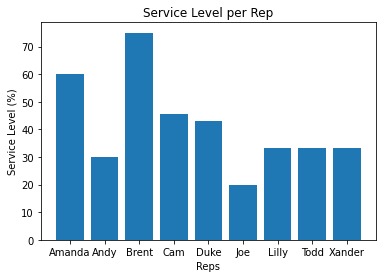

In [18]:
plt.bar(service_level.index,service_level["Service Level %"])
plt.title('Service Level per Rep')
plt.xlabel('Reps')
plt.ylabel('Service Level (%)')
plt.show()

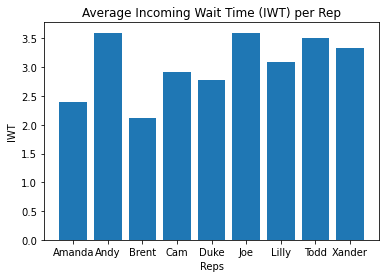

In [19]:
plt.bar(north_plt["Rep ID"],north_plt["Incoming Wait Time"])
plt.title('Average Incoming Wait Time (IWT) per Rep')
plt.xlabel('Reps')
plt.ylabel('IWT')
plt.show()

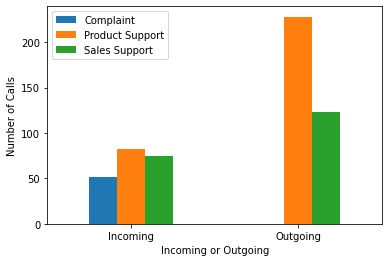

In [46]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
#Important Note: I couldn't understand the code below, so I created my own to make a chart.

purpose_calls = callcenter_df[["Call Purpose","Incoming or Outgoing", "Calls"]]
purpose_df = test.groupby(["Incoming or Outgoing","Call Purpose"]).count()
purpose_df.unstack().plot(kind='bar')
plt.legend(["Complaint", "Product Support", "Sales Support"])
plt.ylabel("Number of Calls")
plt.xticks(rotation = 360)
plt.show()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

In [51]:
print("Question 1:")
print(f'''The average abandonment rate for A is {round(abandonment_rates["A"],3)}, for B is {round(abandonment_rates["B"],3)}, for C is {round(abandonment_rates["C"],3)}, for D is {round(abandonment_rates["D"],3)}.
We chose to represent this as a bar chart so that we could compare the different rates for each queue.\n''')
print("Question 2:")   
print("""Please refer to the charts below to see the service level and average speed 
of answer per each rep. We chose to represent this data with bar charts so that can compare the different 
rates between each rep.\n""")
print("Question 3:")
print("""Please refer to the chart below to see how many calls are incoming vs outgoing for each call purpose. 
We chose to represent this data with a multiple bar chart to observe and compare the different call purposes
while simultaneously looking at whether the call was incoming or outgoing.""")


Question 1:
The average abandonment rate for A is 0.042, for B is 0.02, for C is 0.007, for D is 0.017.
We chose to represent this as a bar chart so that we could compare the different rates for each queue.

Question 2:
Please refer to the charts below to see the service level and average speed 
of answer per each rep. We chose to represent this data with bar charts so that can compare the different 
rates between each rep.

Question 3:
Please refer to the chart below to see how many calls are incoming vs outgoing for each call purpose. 
We chose to represent this data with a multiple bar chart to observe and compare the different call purposes
while simultaneously looking at whether the call was incoming or outgoing.


## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

1. When comparing abandonment rates, the South branch has a lower abandonment rate compared to the South branch. It is also worth noting that the South branch received more calls than the North branch, and still managed to have a lower abandonment rate. The North branch had a higher service level compared to the South branch, but the difference was small. Looking at the average speed of answer across the branches, there was no significant difference. Overall, the South branch seems to be performing a little more efficiently compared to the North branch.
2. Based on the number of reps (North = 9 reps, South = 11 reps) in each branch and how quickly the reps are working, the North branch would benefit from the extra help.
3. To be honest, after looking at this data for many days, there is nothing else I want to know. 

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
